# Projet - Fouille de données

Réalisé par
- Jaouabi Oussama
- Hamdi Helmi

Classe
- IF5

In [1]:
#Importation des modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sujet

Contexte et Problématique :

Dans le domaine de la détection de fraude alimentaire, la détection de l’adultération du miel est un enjeu majeur, car les fraudes liées à la qualité du miel sont de plus en plus fréquentes. Les techniques d’apprentissage supervisées et non supervisées peuvent être utilisées pour identifier les miels frauduleux en analysant diverses caractéristiques, telles que la composition chimique. Dans ce contexte, nous souhaitons explorer un jeu
de données d’imagerie hyperspectrale de miel adultéré et appliquer des techniques de détection de fraude sur ces données.

Sujet :

Application de techniques d’apprentissage supervisées et non supervisées
pour la détection de l’adultération du miel et évaluation (matrice de confusion, rappel,
précision, F-measure ou autre mesure en fonction de la technique appliquée)

# L'analyse exploratoire des données

In [2]:
#Chargement du jeu de données
df = pd.read_csv('Datasets/adulteration.csv')

#Affichage du jeu de données
"""df
print(df.head(10))
print(df.tail(10))"""

#Le nombre d'observations/ Le nombre des attributs
print('Dim =', df.ndim)
print(df.shape)
print('Le jeu de données contient un total de ', df.shape[0], ' instances.')

Dim = 2
(8675, 133)
Le jeu de données contient un total de  8675  instances.


In [3]:
#Les noms des attributs
print(df.columns.to_list())

print("\n******************************************************************************************************\n")

#Les types des attributs
print(df.dtypes)

""" Le jeu de données contient 128 attributs - représentant les longueurs d'onde spectrales de la caméra hyperspectrale.
    Ces longueurs d'onde vont de 400 nm à 1064 nm. """

['Brand', 'Acquisition', 'Concentration_Class', 'Concentration', '399.40nm', '404.39nm', '409.38nm', '414.37nm', '419.37nm', '424.38nm', '429.38nm', '434.40nm', '439.41nm', '444.43nm', '449.45nm', '454.48nm', '459.51nm', '464.54nm', '469.58nm', '474.62nm', '479.67nm', '484.72nm', '489.77nm', '494.83nm', '499.89nm', '504.95nm', '510.02nm', '515.10nm', '520.17nm', '525.25nm', '530.34nm', '535.43nm', '540.52nm', '545.61nm', '550.71nm', '555.82nm', '560.93nm', '566.04nm', '571.15nm', '576.27nm', '581.40nm', '586.52nm', '591.65nm', '596.79nm', '601.93nm', '607.07nm', '612.22nm', '617.37nm', '622.52nm', '627.68nm', '632.84nm', '638.00nm', '643.17nm', '648.35nm', '653.53nm', '658.71nm', '663.89nm', '669.08nm', '674.27nm', '679.47nm', '684.67nm', '689.87nm', '695.08nm', '700.29nm', '705.51nm', '710.73nm', '715.95nm', '721.18nm', '726.41nm', '731.65nm', '736.89nm', '742.13nm', '747.38nm', '752.63nm', '757.88nm', '763.14nm', '768.40nm', '773.67nm', '778.94nm', '784.21nm', '789.49nm', '794.77nm',

" Le jeu de données contient 128 attributs - représentant les longueurs d'onde spectrales de la caméra hyperspectrale.\n    Ces longueurs d'onde vont de 400 nm à 1064 nm. "

In [4]:
#Une brève description du jeu de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Columns: 133 entries, Brand to Class
dtypes: float64(129), int64(2), object(2)
memory usage: 8.8+ MB


In [5]:
#Le résumé statistique du jeu de données
df.describe()

,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,...,1014.66nm,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm
count,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,...,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000
mean,3.492795,21.210375,21.409408,1.010990,1.000701,0.985824,0.967903,0.924619,0.839474,0.705838,...,0.395885,0.395783,0.399881,0.407497,0.419155,0.434333,0.452617,0.471370,0.491992,0.518427
std,1.705093,20.829969,20.817630,0.035927,0.035852,0.034740,0.032214,0.034189,0.042209,0.053436,...,0.037140,0.037647,0.038207,0.038667,0.039125,0.039465,0.039790,0.040014,0.040090,0.040282
min,1.000000,0.000000,0.000000,0.920153,0.897098,0.883949,0.879236,0.834011,0.735861,0.570913,...,0.336157,0.335316,0.336635,0.340854,0.350229,0.359668,0.377267,0.386495,0.405731,0.431541
25%,2.000000,5.000000,5.100000,0.984468,0.973940,0.959895,0.944302,0.901376,0.808138,0.665415,...,0.365473,0.365229,0.369302,0.376571,0.387980,0.403313,0.422358,0.442105,0.463944,0.491342
50%,3.000000,10.000000,10.200000,1.005687,0.995931,0.981429,0.964417,0.921528,0.835100,0.699941,...,0.389018,0.387813,0.391050,0.397971,0.409096,0.424212,0.442930,0.462629,0.484104,0.511836
75%,5.000000,25.000000,25.280000,1.035234,1.024786,1.008960,0.987066,0.944934,0.865902,0.739983,...,0.422947,0.422749,0.426646,0.434484,0.445368,0.459482,0.476847,0.494515,0.513860,0.538322
max,6.000000,100.000000,100.000000,1.160034,1.145434,1.126460,1.091392,1.071707,1.029565,0.952382,...,0.505566,0.508406,0.514678,0.523624,0.536547,0.555101,0.576369,0.594769,0.615018,0.640209


In [6]:
#Origines botaniques du miel
print(df['Class'].value_counts())

print('\nLe jeu de données contient ', df['Class'].value_counts().size, ' produits de miel différents provenant de ', df['Brand'].value_counts().size - 1 , ' marques différentes, avec ', df['Class'].value_counts().size - 1, ' étiquettes d\'origine botanique différentes (de Nouvelle-Zélande).')

Manuka         1350
Clover         1200
ManukaBlend    1200
BorageField     750
Kamahi          750
ManukaUMF20     600
ManukaUMF5      600
ManukaUMF15     600
ManukaUMF10     575
Rewarewa        450
MultiFloral     450
Sugar           150
Name: Class, dtype: int64

Le jeu de données contient  12  produits de miel différents provenant de  7  marques différentes, avec  11  étiquettes d'origine botanique différentes (de Nouvelle-Zélande).


In [7]:
#Les différnetes Brands
print(df['Brand'].value_counts())

print("\n******************************************************************************************************\n")

#Les différnetes valeurs de l'attribut Concentration_Class
print(df['Concentration'].value_counts())

print("\n******************************************************************************************************\n")

#Les différnetes valeurs de l'attribut Concentration_Class
print(df['Concentration_Class'].value_counts())

print("\n******************************************************************************************************\n")

#Les différnetes valeurs de l'attribut Acquisition
print(df['Acquisition'].value_counts())

""" Acquisition : représente les différentes images d'échantillons pour le même type et la même marque de miel.
Chaque échantillon est numéroté de un à six pour indiquer l'acquisition correspondante. """

C10      2250
C7       1950
C9       1350
C1       1200
C8        750
C4        575
C5        450
Sugar     150
Name: Brand, dtype: int64

******************************************************************************************************

0.000000      1050
24.900000      750
10.000000      750
50.000000      725
5.000000       450
50.100000      300
4.900000       300
24.800000      300
5.100000       300
9.850000       300
50.086600      175
8.470000       150
25.280000      150
49.870000      150
9.990000       150
25.000000      150
9.980000       150
10.200000      150
4.980000       150
49.900000      150
50.400000      150
4.970000       150
10.344400      150
25.050700      150
24.886752      150
49.800000      150
49.964434      150
5.189800       150
5.290000       150
10.204300      150
24.930000      150
100.000000     150
5.251216       125
Name: Concentration, dtype: int64

***********************************************************************************************

" Acquisition : représente les différentes images d'échantillons pour le même type et la même marque de miel.\nChaque échantillon est numéroté de un à six pour indiquer l'acquisition correspondante. "

In [8]:
#Le nombre de valeurs manquantes

print(df.isnull().sum().to_list())

""" On constate qu'il n'y a pas de valeurs manquantes dans ce jeu de données. """

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


" On constate qu'il n'y a pas de valeurs manquantes dans ce jeu de données. "

In [9]:
#Le jeu de données sur le miel falsifié de chaque marque et l'étiquette d'origine botanique du miel.
df.groupby(['Brand', 'Class'])['Concentration_Class'].agg(['count'])

#Ou bien: 
    #df.groupby(['Brand', 'Class']).count()['Concentration_Class']

count
Brand Class             
C1    Clover        1200
C10   ManukaUMF15    600
      ManukaUMF20    600
      ManukaUMF5     600
      MultiFloral    450
C4    ManukaUMF10    575
C5    ManukaBlend    450
C7    BorageField    750
      Kamahi         750
      Rewarewa       450
C8    ManukaBlend    750
C9    Manuka        1350
Sugar Sugar          150

In [10]:
def mean_spectral_response_of_each_honey_type(honey_type):
    df1 = df[df['Class']==honey_type]
    for concentration in df['Concentration_Class'].unique():
        df2 = df1[df1['Concentration_Class']==concentration]

        wavelengths = df2.columns[4:-1] #Sélectionner les colonnes de 399.40nm à 1063.79nm
        intensity_means = df2.iloc[:, 4:-1].mean(axis=0) #Calculer les moyennes des intensités pour chaque colonne

        label = 'Honey' if concentration == 0 else f'Adulterated {concentration} %'
        
        # Tracer la courbe
        plt.plot(wavelengths, intensity_means, label=label)
    plt.title(f'{honey_type}')
    plt.xlabel('wavelength (Longueur d\'onde) (en nm)')
    plt.ylabel('Intensity (Intensité moyenne)')
    plt.legend()
    plt.show()

Fig: La réponse spectrale moyenne de chaque type de miel à différentes concentrations de falsification. 


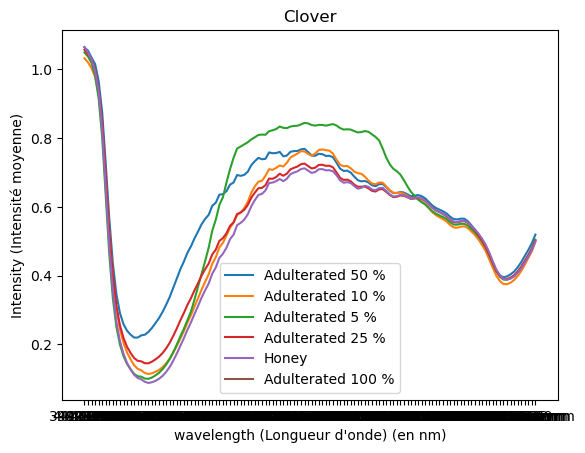

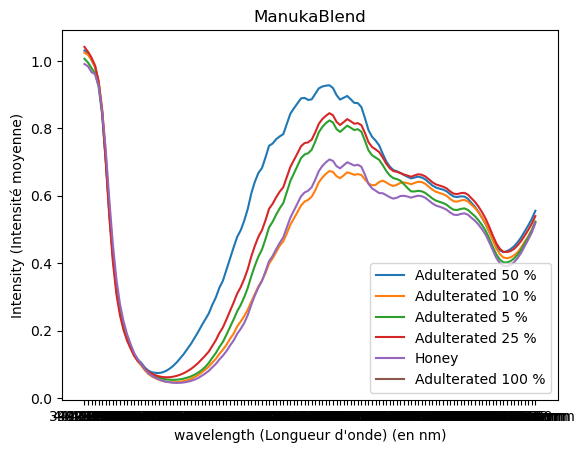

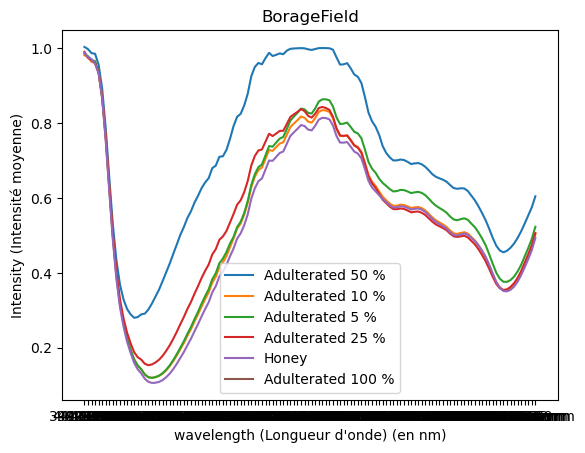

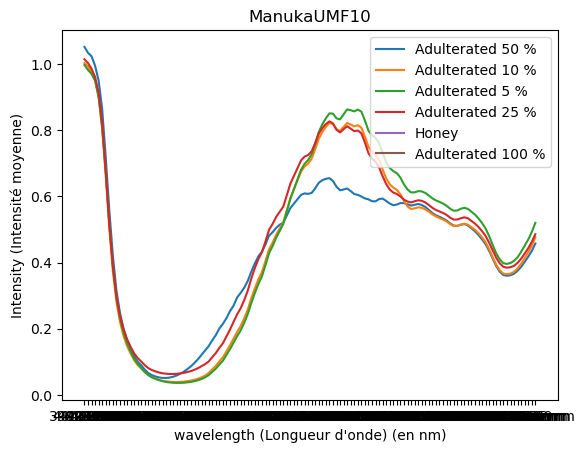

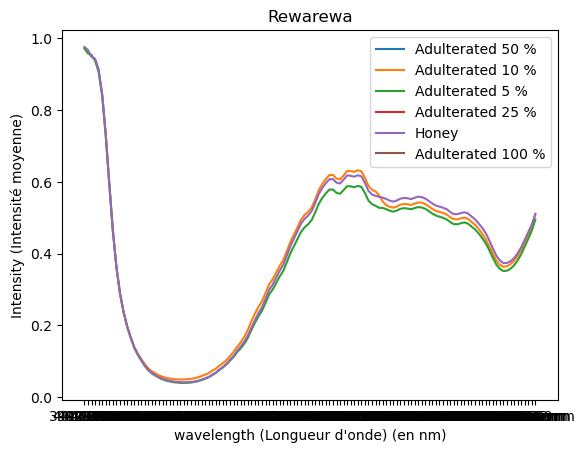

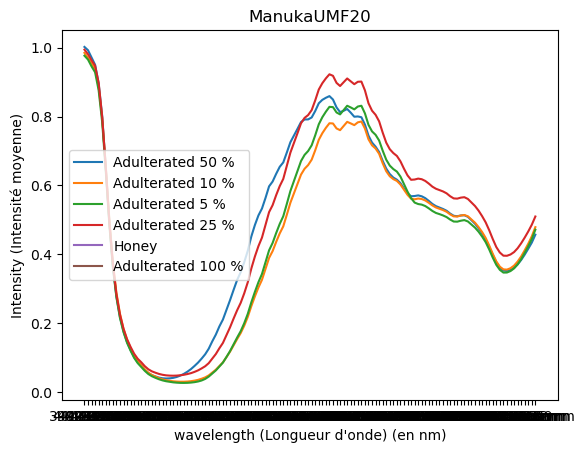

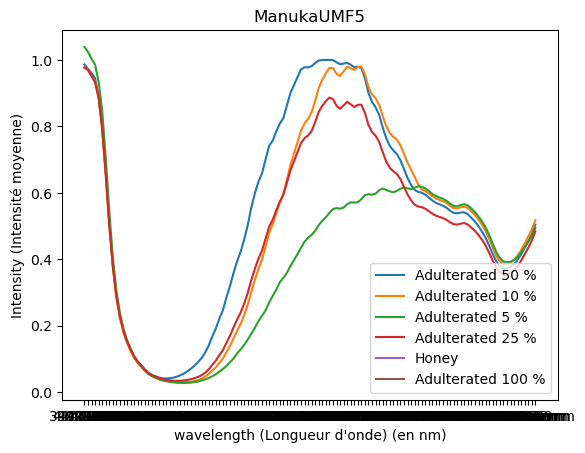

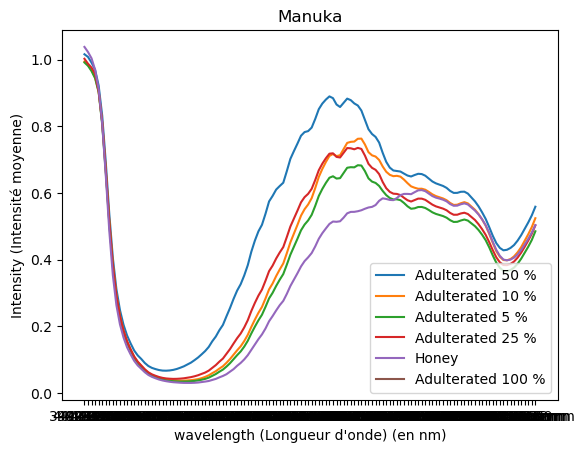

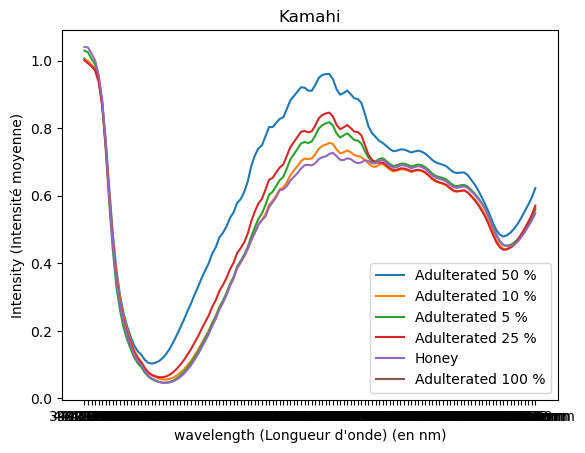

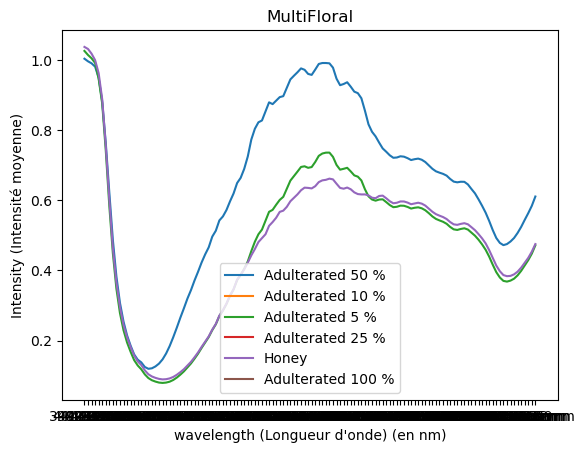

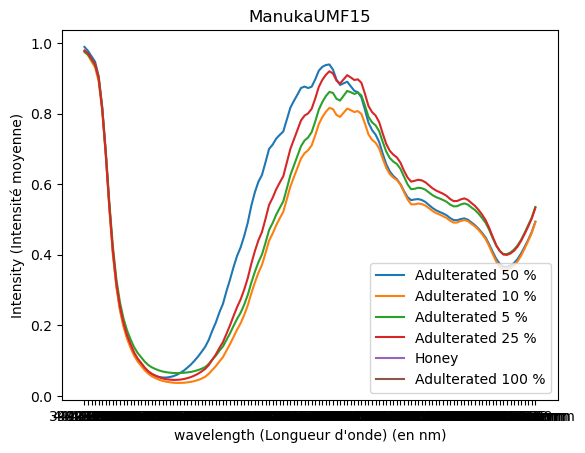

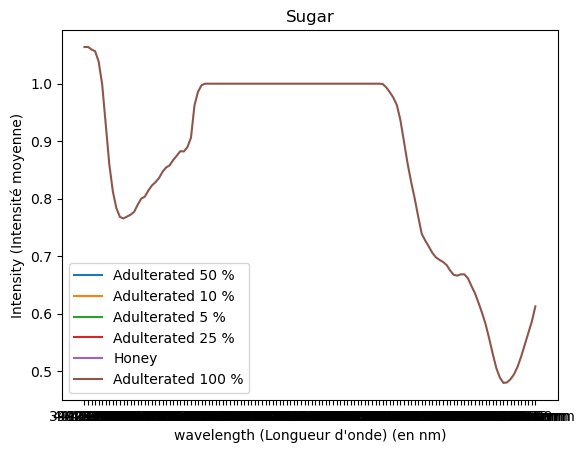

In [11]:
print('Fig: La réponse spectrale moyenne de chaque type de miel à différentes concentrations de falsification. ')
for honey_type in df['Class'].unique():
    mean_spectral_response_of_each_honey_type(honey_type)

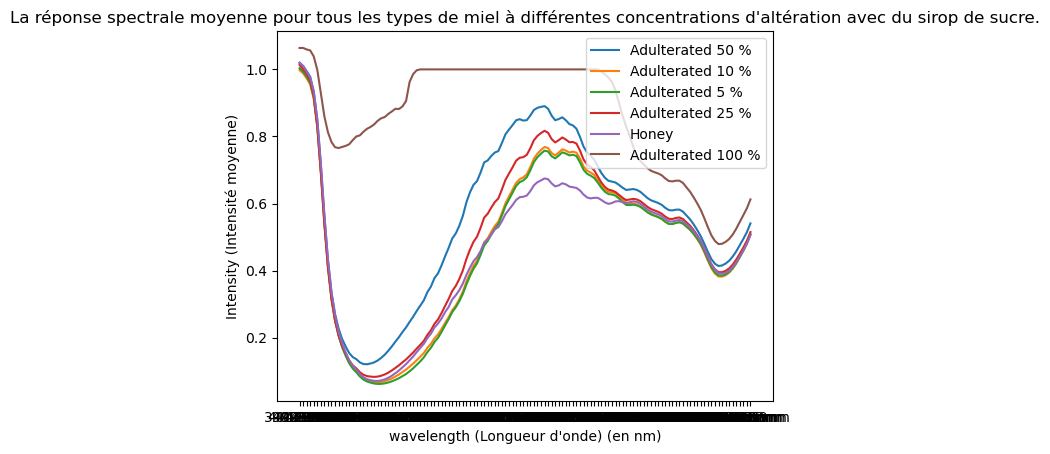

In [12]:
def mean_spectral_response_for_all_honey_types():
    for concentration in df['Concentration_Class'].unique():
        df1 = df[df['Concentration_Class']==concentration]

        wavelengths = df1.columns[4:-1] # Sélectionner les colonnes de 399.40nm à 1063.79nm
        intensity_means = df1.iloc[:, 4:-1].mean(axis=0) # Calculer les moyennes des intensités pour chaque colonne

        label = 'Honey' if concentration == 0 else f'Adulterated {concentration} %'
        
        # Tracer la courbe
        plt.plot(wavelengths, intensity_means, label=label)
        plt.title('La réponse spectrale moyenne pour tous les types de miel à différentes concentrations d\'altération avec du sirop de sucre.')
        plt.xlabel('wavelength (Longueur d\'onde) (en nm)')
        plt.ylabel('Intensity (Intensité moyenne)')
        plt.legend()
    plt.show()
    
mean_spectral_response_for_all_honey_types()

Le jeu de données est utilisé dans le contexte d'une tâche de classification.

# Traitement de données

In [13]:
print(df['Concentration_Class'].value_counts())

""" => Pb de classifcation """

#La création d'une colonne supplémentaire appelée "Adulteration" qui prend la valeur zéro si la concentration est égale à zéro, sinon elle prend la valeur un.
df['Adulteration'] = df['Concentration_Class'].apply(lambda x: 0 if x == 0 else 1)

df[df['Adulteration'] == 0]

5      1950
50     1925
10     1800
25     1800
0      1050
100     150
Name: Concentration_Class, dtype: int64


,Brand,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,...,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class,Adulteration
150,C7,1,0,0.0,0.957137,0.977561,0.935084,0.950297,0.871583,0.830632,...,0.385009,0.391466,0.403759,0.417480,0.437870,0.459810,0.476276,0.505509,Rewarewa,0
151,C7,1,0,0.0,0.971204,0.970429,0.957461,0.945425,0.913894,0.852630,...,0.394644,0.401127,0.415073,0.427423,0.448884,0.469333,0.489848,0.515848,Rewarewa,0
152,C7,1,0,0.0,0.996474,0.984149,0.962101,0.979696,0.902104,0.852465,...,0.401904,0.408353,0.415463,0.435055,0.456061,0.472307,0.496259,0.520197,Rewarewa,0
153,C7,1,0,0.0,1.005392,0.971730,0.923220,0.957279,0.898061,0.852265,...,0.384851,0.389229,0.402881,0.416354,0.438750,0.460352,0.480173,0.508502,Rewarewa,0
154,C7,1,0,0.0,1.016454,0.976946,0.957986,0.950563,0.951748,0.844256,...,0.375080,0.382132,0.391563,0.409174,0.430692,0.448756,0.470460,0.497552,Rewarewa,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8145,C1,1,0,0.0,1.051051,1.035902,1.023299,1.000431,0.931889,0.846557,...,0.407259,0.416836,0.426270,0.435148,0.454104,0.472966,0.488836,0.506698,Clover,0
8146,C1,1,0,0.0,1.104817,1.077899,1.043388,1.028197,1.003360,0.845921,...,0.415175,0.422037,0.432031,0.439921,0.456230,0.478126,0.491020,0.510278,Clover,0
8147,C1,1,0,0.0,1.110442,1.063537,1.049438,0.963914,0.972894,0.857333,...,0.410213,0.411685,0.422786,0.439360,0.451824,0.468987,0.488492,0.505683,Clover,0
8148,C1,1,0,0.0,1.073234,1.050190,1.052387,0.985967,0.916171,0.852783,...,0.411754,0.415725,0.427506,0.441095,0.454860,0.474369,0.496185,0.511510,Clover,0


# Modélisation :

# Application de techniques d’apprentissage supervisées

In [14]:
#Importation des modules nécessaires
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as m
from sklearn.preprocessing import LabelEncoder
from sklearn import svm

1) Classification binaire

    a. KNN  

In [15]:
c = df.shape[1]

X = df.values[:,4:c-2]
y = df.values[:,c-1]

#Convertir le type de la variable y de OBJECT à INT.
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print(y.dtype)

int32


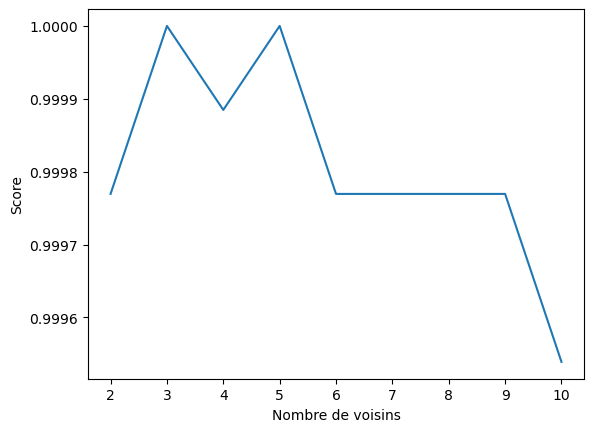

In [16]:
#La variation du score de classification en fonction de la variation du nombre de voisins :

def varier_k(X,y):
    L1 = []
    L2 = []

    for k in range(2, 11):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X, y)
        s = knn.score(X, y)
        L1.append(k)
        L2.append(s)

    plt.plot(L1, L2)
    plt.xlabel("Nombre de voisins")
    plt.ylabel("Score")
    
varier_k(X,y)   

In [17]:
#Cross Validation :

knn = KNeighborsClassifier(n_neighbors=5)

print("Accuracy :")
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

print("\nPrecision :")
print(cross_val_score(knn, X, y, cv=10, scoring='precision').mean())

print("\nRecall :")
print(cross_val_score(knn, X, y, cv=10, scoring='recall').mean())

print("\nF1 :")
print(cross_val_score(knn, X, y, cv=10, scoring='f1').mean())

Accuracy :
0.9855865875762069

Precision :
0.9926559040444453

Recall :
0.9909459138708578

F1 :
0.9916940071106024


Training Set :

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0

Testing Set :

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


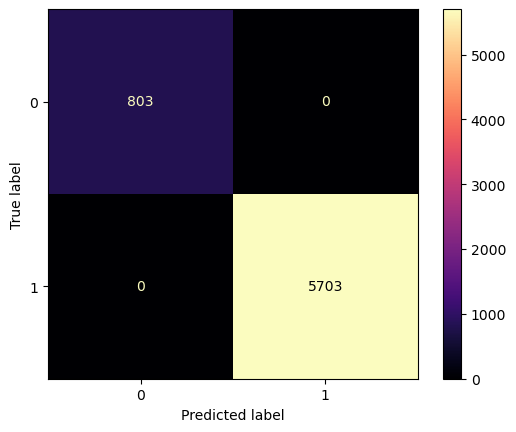

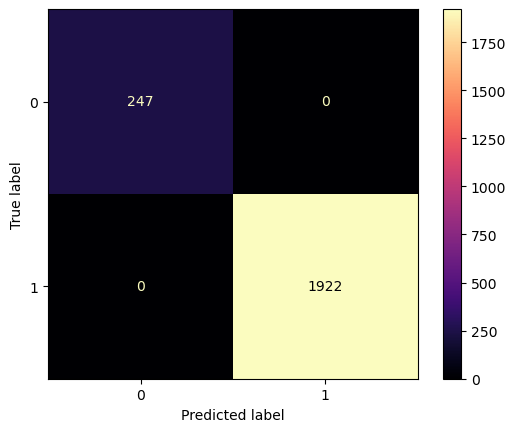

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, ytrain)

#Training Set :

print('Training Set :\n')

ypred = knn.predict(Xtrain)

print(m.ConfusionMatrixDisplay.from_predictions(ytrain, ypred, cmap='magma'))

print('Accuracy:', m.accuracy_score(ytrain, ypred))
print('Precision:', m.precision_score(ytrain, ypred))
print('Recall:', m.recall_score(ytrain, ypred))
print('F1:', m.f1_score(ytrain, ypred))

#Testing Set :

print('\nTesting Set :\n')

ypred_test = knn.predict(Xtest)

print(m.ConfusionMatrixDisplay.from_predictions(ytest, ypred_test, cmap='magma'))

print('Accuracy:', m.accuracy_score(ytest, ypred_test))
print('Precision:', m.precision_score(ytest, ypred_test))
print('Recall:', m.recall_score(ytest, ypred_test))
print('F1:', m.f1_score(ytest, ypred_test))

b. LinearSVM (Support Vector Machine)

Linear SVM est un algorithme d'apprentissage supervisé utilisé pour la classification et la régression.

Linear SVM cherche à trouver un hyperplan de séparation (une frontière) optimal entre les différentes classes en maximisant la marge tout en minimisant les erreurs de classification, ce qui en fait un puissant outil pour la classification linéaire dans des espaces de dimensions supérieures.

Dans le cas linéaire, cet hyperplan est une ligne qui divise l'espace en deux régions, une pour chaque classe.

La marge est définie comme la distance entre l'hyperplan et les vecteurs de support les plus proches.

Les vecteurs de support sont les échantillons de données qui se trouvent le plus près de l'hyperplan de séparation. Ce sont ces points qui définissent effectivement la position de l'hyperplan et influent sur la marge maximale.

Si les données ne sont pas linéairement séparables, SVM peut utiliser des astuces de noyau (kernel tricks) pour transformer l'espace des caractéristiques, permettant ainsi une séparation non linéaire dans un espace de dimension supérieure.

In [19]:
#Cross Validation :

svm_model = svm.SVC(kernel='linear')

print("Accuracy :")
print(cross_val_score(svm_model, X, y, cv=10, scoring='accuracy').mean())

print("\nPrecision :")
print(cross_val_score(svm_model, X, y, cv=10, scoring='precision').mean())

print("\nRecall :")
print(cross_val_score(svm_model, X, y, cv=10, scoring='recall').mean())

print("\nF1 :")
print(cross_val_score(svm_model, X, y, cv=10, scoring='f1').mean())

Accuracy :
0.878962495814265

Precision :
0.878962495814265

Recall :
1.0

F1 :
0.9355827978406406


Training Set :

Accuracy: 0.8781125115278204
Precision: 0.8781125115278204
Recall: 1.0
F1: 0.9351010721008266

Testing Set :

Accuracy: 0.8815122176118027
Precision: 0.8815122176118027
Recall: 1.0
F1: 0.9370252389120314


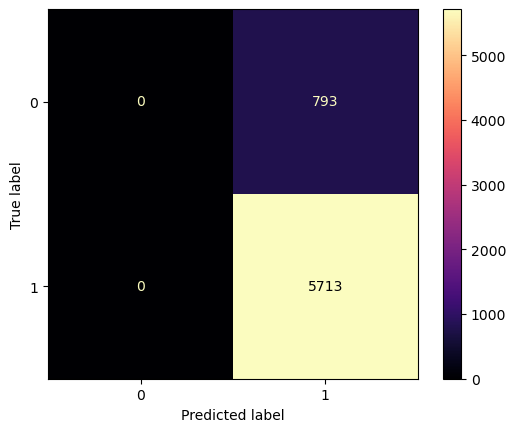

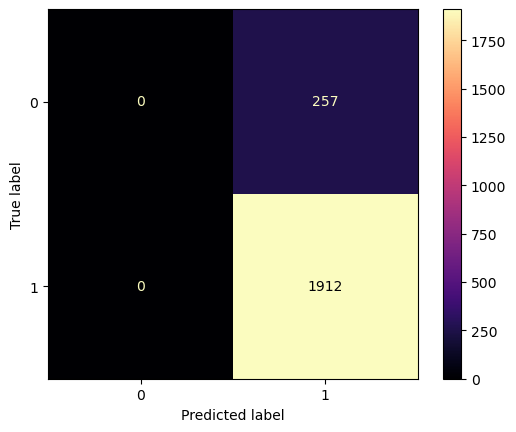

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

svm_model = svm.SVC(kernel='linear')
svm_model.fit(Xtrain, ytrain)

#Training Set :

print('Training Set :\n')

ypred = svm_model.predict(Xtrain)

print(m.ConfusionMatrixDisplay.from_predictions(ytrain, ypred, cmap='magma'))

print('Accuracy:', m.accuracy_score(ytrain, ypred))
print('Precision:', m.precision_score(ytrain, ypred))
print('Recall:', m.recall_score(ytrain, ypred))
print('F1:', m.f1_score(ytrain, ypred))

#Testing Set :

print('\nTesting Set :\n')

ypred_test = svm_model.predict(Xtest)

print(m.ConfusionMatrixDisplay.from_predictions(ytest, ypred_test, cmap='magma'))

print('Accuracy:', m.accuracy_score(ytest, ypred_test))
print('Precision:', m.precision_score(ytest, ypred_test))
print('Recall:', m.recall_score(ytest, ypred_test))
print('F1:', m.f1_score(ytest, ypred_test))

c. RBFSVM (Radial Basis Function Support Vector Machine)

Le RBF SVM est une extension du SVM qui utilise une fonction de base radiale pour gérer des données non linéaires, permettant ainsi la séparation efficace de classes complexes dans des espaces de caractéristiques de dimension supérieure.

In [21]:
#Cross Validation :

rbf_model = svm.SVC(kernel='rbf')

print("Accuracy :")
print(cross_val_score(rbf_model, X, y, cv=10, scoring='accuracy').mean())

print("\nPrecision :")
print(cross_val_score(rbf_model, X, y, cv=10, scoring='precision').mean())

print("\nRecall :")
print(cross_val_score(rbf_model, X, y, cv=10, scoring='recall').mean())

print("\nF1 :")
print(cross_val_score(rbf_model, X, y, cv=10, scoring='f1').mean())

Accuracy :
0.878962495814265

Precision :
0.878962495814265

Recall :
1.0

F1 :
0.9355827978406406


Training Set :

Accuracy: 0.8785736243467568
Precision: 0.8785736243467568
Recall: 1.0
F1: 0.935362461135657

Testing Set :

Accuracy: 0.880129091747349
Precision: 0.880129091747349
Recall: 1.0
F1: 0.9362432564982834


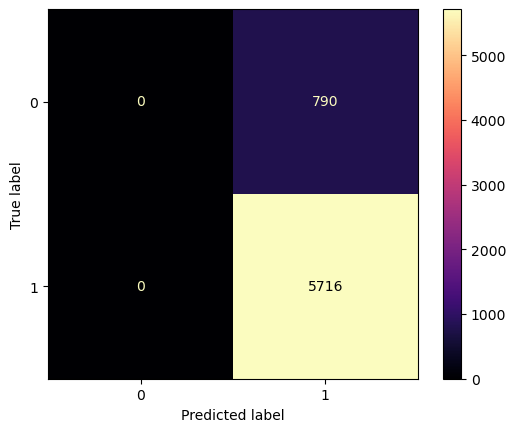

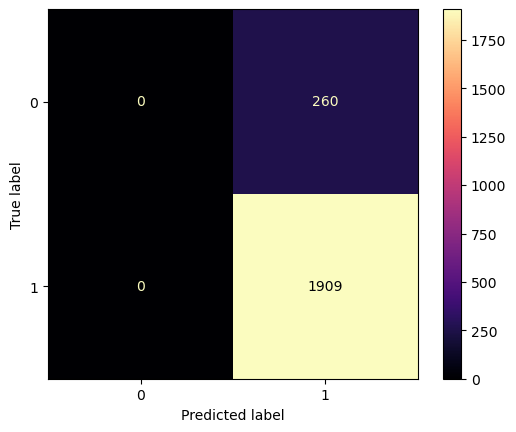

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

rbf_model = svm.SVC(kernel='rbf')
rbf_model.fit(Xtrain, ytrain)

#Training Set :

print('Training Set :\n')

ypred = rbf_model.predict(Xtrain)

print(m.ConfusionMatrixDisplay.from_predictions(ytrain, ypred, cmap='magma'))

print('Accuracy:', m.accuracy_score(ytrain, ypred))
print('Precision:', m.precision_score(ytrain, ypred))
print('Recall:', m.recall_score(ytrain, ypred))
print('F1:', m.f1_score(ytrain, ypred))

#Testing Set :

print('\nTesting Set :\n')

ypred_test = rbf_model.predict(Xtest)

print(m.ConfusionMatrixDisplay.from_predictions(ytest, ypred_test, cmap='magma'))

print('Accuracy:', m.accuracy_score(ytest, ypred_test))
print('Precision:', m.precision_score(ytest, ypred_test))
print('Recall:', m.recall_score(ytest, ypred_test))
print('F1:', m.f1_score(ytest, ypred_test))

2) Classification multi-classe

    a. KNN  

In [23]:
c = df.shape[1]

X = df.values[:,4:c-2]
y = df['Concentration_Class'].values

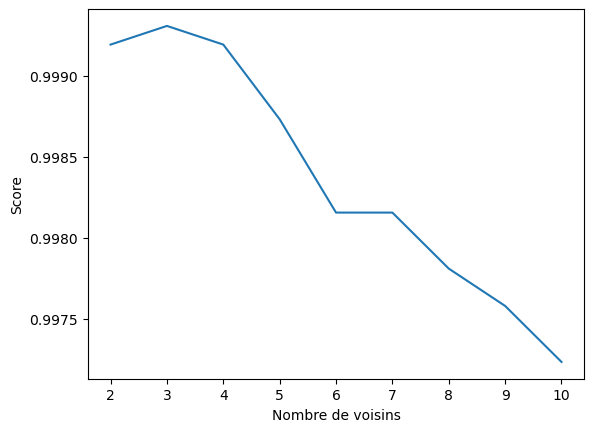

In [24]:
#La variation du score de classification en fonction de la variation du nombre de voisins :
varier_k(X,y)

In [25]:
#Cross Validation :

knn = KNeighborsClassifier(n_neighbors=3)

print("Accuracy :", cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
print("Precision :", cross_val_score(knn, X, y, cv=10, scoring='precision_macro').mean())
print("Recall :", cross_val_score(knn, X, y, cv=10, scoring='recall_macro').mean())
print("F1 :", cross_val_score(knn, X, y, cv=10, scoring='f1_macro').mean())

Accuracy : 0.9213817975007839
Precision : 0.9393507884071619
Recall : 0.9348552393921563
F1 : 0.93530444073835


Training Set :

Accuracy: 0.9993851829080849
Precision: 0.9993853743745315
Recall: 0.9993851829080849
F1: 0.9993851491702472

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       799
           5       1.00      1.00      1.00      1440
          10       1.00      1.00      1.00      1343
          25       1.00      1.00      1.00      1360
          50       1.00      1.00      1.00      1447
         100       1.00      1.00      1.00       117

    accuracy                           1.00      6506
   macro avg       1.00      1.00      1.00      6506
weighted avg       1.00      1.00      1.00      6506


Testing Set :

Accuracy: 0.9990779160903642
Precision: 0.9990779160903642
Recall: 0.9990779160903642
F1: 0.9990779160903642

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           5       1.00      1.00      1.00     

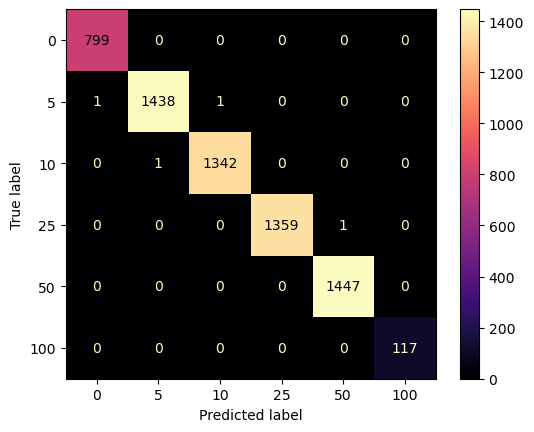

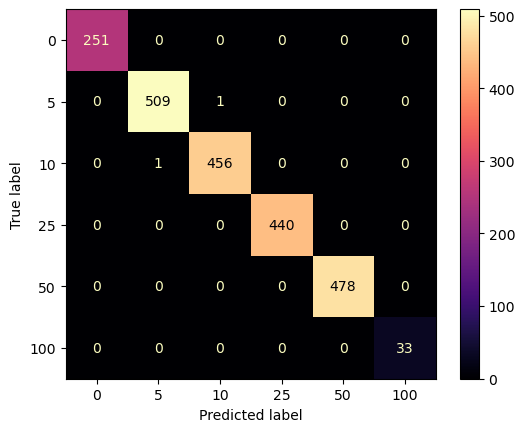

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)

#Traning Set :

print('Training Set :\n')

ypred = knn.predict(Xtrain)

print('Accuracy:', m.accuracy_score(ytrain, ypred))
print('Precision:', m.precision_score(ytrain, ypred, average='weighted')) #micro, macro
print('Recall:', m.recall_score(ytrain, ypred, average='weighted')) #micro, macro
print('F1:', m.f1_score(ytrain, ypred, average='weighted')) #micro, macro

print('\nClassification Report:\n', m.classification_report(ytrain, ypred))

#Testing Set :

print('\nTesting Set :\n')

ypred_test = knn.predict(Xtest)

print('Accuracy:', m.accuracy_score(ytest, ypred_test))
print('Precision:', m.precision_score(ytest, ypred_test, average='weighted')) #micro, macro
print('Recall:', m.recall_score(ytest, ypred_test, average='weighted')) #micro, macro
print('F1:', m.f1_score(ytest, ypred_test, average='weighted')) #micro, macro

print('\nClassification Report:\n', m.classification_report(ytest, ypred_test))

print(m.ConfusionMatrixDisplay.from_predictions(ytrain, ypred, cmap='magma'))
print(m.ConfusionMatrixDisplay.from_predictions(ytest, ypred_test, cmap='magma'))

b. LinearSVM

La classification multiclasse avec SVM peut être abordée de 2 manières principales : la stratégie "one-vs-one" (un contre un) et la stratégie "one-vs-the-rest" (un contre le reste).

- One-vs-One (OvO) : 

Pour chaque paire de classes distinctes, un classificateur binaire SVM est entraîné.
Si vous avez K classes, cela conduit à K * (K-1) / 2 classificateurs binaires.
Lors de la prédiction, chaque classificateur binaire donne une voix pour une classe, et la classe avec le plus grand nombre de voix est choisie comme la classe finale.

- One-vs-the-Rest (OvR ou One-vs-All) :

Pour chaque classe, un classificateur binaire SVM est entraîné pour différencier cette classe des autres.
Si vous avez K classes, cela conduit à K classificateurs binaires.
Lors de la prédiction, chaque classificateur binaire donne une mesure de confiance pour sa classe respective, et la classe avec la plus grande mesure est choisie comme la classe finale.

➪ La stratégie OvO est souvent préférée lorsque les SVM sont utilisés pour la classification multiclasse, car elle nécessite généralement moins de données pour l'entraînement de chaque classificateur binaire.

➪ Cependant, pour des ensembles de données de taille modérée à grande, la stratégie OvR est souvent plus efficace en termes de temps de calcul, car elle nécessite moins de classificateurs binaires.

In [27]:
#Cross Validation :

svm_model = svm.SVC(kernel='linear')

print("Accuracy :")
print(cross_val_score(svm_model, X, y, cv=10, scoring='accuracy').mean())

print("\nPrecision :")
print(cross_val_score(svm_model, X, y, cv=10, scoring='precision_macro').mean())

print("\nRecall :")
print(cross_val_score(svm_model, X, y, cv=10, scoring='recall_macro').mean())

print("\nF1 :")
print(cross_val_score(svm_model, X, y, cv=10, scoring='f1_macro').mean())

Accuracy :
0.5026085766374861

Precision :
0.6090547796862764

Recall :
0.5699723534956695

F1 :
0.5672412876772258


Training Set :

Accuracy: 0.5610205963725792
Precision: 0.5859990243820348
Recall: 0.5610205963725792
F1: 0.5485568775172509

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.51      0.55       766
           5       0.41      0.70      0.52      1465
          10       0.59      0.30      0.40      1344
          25       0.58      0.36      0.44      1347
          50       0.73      0.83      0.78      1458
         100       1.00      1.00      1.00       126

    accuracy                           0.56      6506
   macro avg       0.65      0.62      0.61      6506
weighted avg       0.59      0.56      0.55      6506


Testing Set :

Accuracy: 0.5684647302904564
Precision: 0.5947502043204469
Recall: 0.5684647302904564
F1: 0.5566245227726921

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.58      0.61       284
           5       0.42      0.71      0.53     

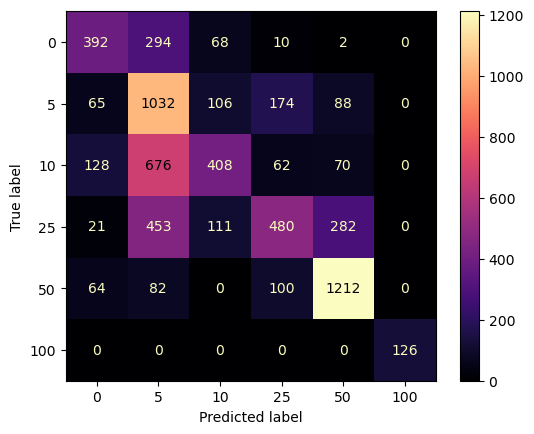

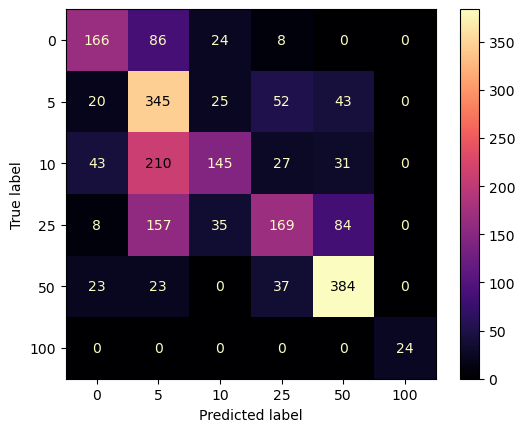

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
svm_model = svm.SVC(kernel='linear')
svm_model.fit(Xtrain, ytrain)

#Traning Set :

print('Training Set :\n')

ypred = svm_model.predict(Xtrain)

print('Accuracy:', m.accuracy_score(ytrain, ypred))
print('Precision:', m.precision_score(ytrain, ypred, average='weighted')) #micro, macro
print('Recall:', m.recall_score(ytrain, ypred, average='weighted')) #micro, macro
print('F1:', m.f1_score(ytrain, ypred, average='weighted')) #micro, macro

print('\nClassification Report:\n', m.classification_report(ytrain, ypred))

#Testing Set :

print('\nTesting Set :\n')

ypred_test = svm_model.predict(Xtest)

print('Accuracy:', m.accuracy_score(ytest, ypred_test))
print('Precision:', m.precision_score(ytest, ypred_test, average='weighted')) #micro, macro
print('Recall:', m.recall_score(ytest, ypred_test, average='weighted')) #micro, macro
print('F1:', m.f1_score(ytest, ypred_test, average='weighted')) #micro, macro

print('\nClassification Report:\n', m.classification_report(ytest, ypred_test))

print(m.ConfusionMatrixDisplay.from_predictions(ytrain, ypred, cmap='magma'))
print(m.ConfusionMatrixDisplay.from_predictions(ytest, ypred_test, cmap='magma'))

c. RBFSVM

In [29]:
#Cross Validation :

rbf_model = svm.SVC(kernel='rbf')

print("Accuracy :")
print(cross_val_score(rbf_model, X, y, cv=10, scoring='accuracy').mean())

print("\nPrecision :")
print(cross_val_score(rbf_model, X, y, cv=10, scoring='precision_macro').mean())

print("\nRecall :")
print(cross_val_score(rbf_model, X, y, cv=10, scoring='recall_macro').mean())

print("\nF1 :")
print(cross_val_score(rbf_model, X, y, cv=10, scoring='f1_macro').mean())

Accuracy :
0.4502777201962379

Precision :
0.564021033800442

Recall :
0.5265846922639345

F1 :
0.5314246631927368


Training Set :

Accuracy: 0.5660928373808792
Precision: 0.5877373522813084
Recall: 0.5660928373808792
F1: 0.5534794639182467

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.52      0.55       782
           5       0.42      0.71      0.52      1449
          10       0.57      0.33      0.42      1356
          25       0.59      0.34      0.43      1333
          50       0.74      0.84      0.78      1462
         100       1.00      1.00      1.00       124

    accuracy                           0.57      6506
   macro avg       0.65      0.62      0.62      6506
weighted avg       0.59      0.57      0.55      6506


Testing Set :

Accuracy: 0.5504840940525588
Precision: 0.5674104962000177
Recall: 0.5504840940525588
F1: 0.5356304371686058

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.53      0.56       268
           5       0.41      0.70      0.52     

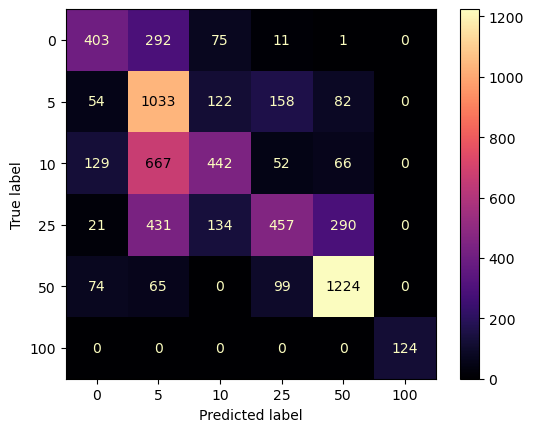

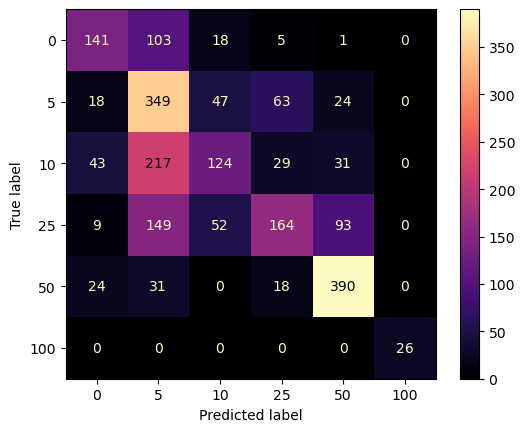

In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
rbf_model = svm.SVC(kernel='linear')
rbf_model.fit(Xtrain, ytrain)

#Traning Set :

print('Training Set :\n')

ypred = rbf_model.predict(Xtrain)

print('Accuracy:', m.accuracy_score(ytrain, ypred))
print('Precision:', m.precision_score(ytrain, ypred, average='weighted')) #micro, macro
print('Recall:', m.recall_score(ytrain, ypred, average='weighted')) #micro, macro
print('F1:', m.f1_score(ytrain, ypred, average='weighted')) #micro, macro

print('\nClassification Report:\n', m.classification_report(ytrain, ypred))

#Testing Set :

print('\nTesting Set :\n')

ypred_test = rbf_model.predict(Xtest)

print('Accuracy:', m.accuracy_score(ytest, ypred_test))
print('Precision:', m.precision_score(ytest, ypred_test, average='weighted')) #micro, macro
print('Recall:', m.recall_score(ytest, ypred_test, average='weighted')) #micro, macro
print('F1:', m.f1_score(ytest, ypred_test, average='weighted')) #micro, macro

print('\nClassification Report:\n', m.classification_report(ytest, ypred_test))

print(m.ConfusionMatrixDisplay.from_predictions(ytrain, ypred, cmap='magma'))
print(m.ConfusionMatrixDisplay.from_predictions(ytest, ypred_test, cmap='magma'))

# Application de techniques d’apprentissage non supervisées :

In [31]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

#print(kmeans.cluster_centers_)
print(kmeans.labels_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 1 1 1]


In [33]:
df[df['Adulteration']==1]

print(kmeans.labels_[8670])

1


In [34]:
true_class = df['Adulteration']
true_class

mse = np.mean((true_class - kmeans.labels_)**2)
print("MSE =", mse)

MSE = 0.5905475504322767


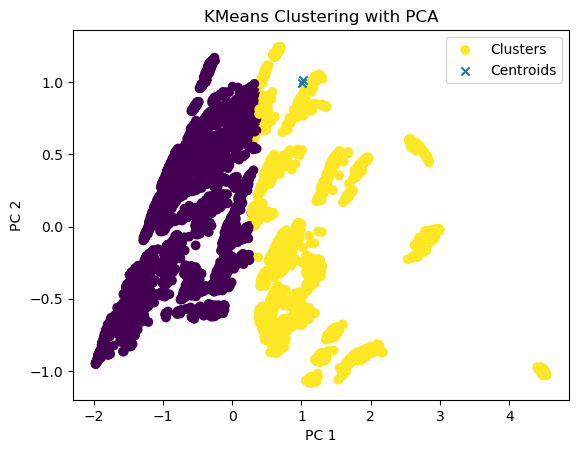

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, marker='o', label='Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', label='Centroids')

plt.title('KMeans Clustering with PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

Références :

Tessa Phillips, Waleed Abdulla. A new honey adulteration detection approach
using hyperspectral imaging and machine learning. European Food Research and
Technology (2023) 249 :259-272.
https://link.springer.com/article/10.1007/s00217-022-04113-9

Hyperspectral Imaging adulterated honey dataset : https://auckland.figshare.com/articles/dataset/Hyperspectral_Imaging_adulterated_honey_dataset/16441686/1

https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#linear-svms

https://www.youtube.com/watch?v=ccgFX_BQwd8